In [1]:
%run -i settings.py

In [2]:
dop1, x1 = ecvproc.ep_read('./data/M1500_4-21@0.320.EP')

In [3]:
M1500 = [        
    [ 200, 'GaAs', 0.0, 2.0e17, 'n'],
    [ 600, 'GaAs', 0.0, 11e14, 'n'],
    [ 1e4, 'GaAs', 0.0, 2e14, 'n'], 
  ]

x = [0]
n = [2e17]
for i,l in enumerate(M1500):
        x.append(x[i]+l[0])
        n.append(l[3])

x2 = np.linspace(0, 2000, 300)
j = 0
n2 = []
for i,xi in enumerate(x2):
    n2.append(n[j])
    if xi>=x[j]:
        j += 1   

In [4]:
data =np.genfromtxt('./data/M1500_result.out.vg_0.00-cb.res').T
x_sim = data[0]*1e7 #nm
n_sim = data[5]

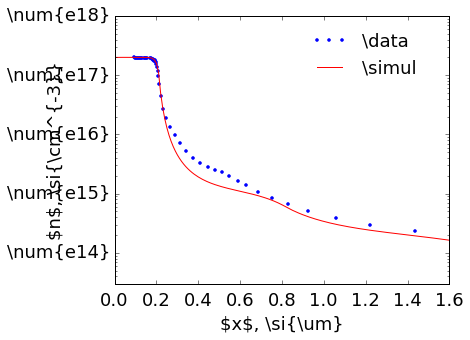

In [21]:
fig = plt.figure()
n_x = fig.add_subplot(111)
n_x.plot(x1, abs(dop1), 'b.', label=r'\data')
n_x.plot(x_sim/1000, n_sim, 'r-', label=r'\simul')

n_x.set_xlabel(r'\$x$, \si{\um}')
n_x.set_ylabel(r'\$n$, \si{\cm^{-3}}' )
n_x.set_yscale('log')
# n_x.set_xscale('log')
# n_x.set_xlim(0, 60)
n_x.set_xlim(0, 1.6)
# n_x.set_ylim(9e9,1e18)
n_x.set_ylim(3e13,1e18)
#n_x.set_xticks(np.arange(0, 501, 10), minor=True)  
# plt.grid(True, ls='-')
# n_x.grid(which='minor', alpha=0.2, ls='-')  
n_x.yaxis.set_major_formatter(exponent) # exponent in setup.py
n_x.yaxis.set_label_coords(-0.15,0.5)
n_x.tick_params(axis='x', pad=8)
plt.legend(loc='best', frameon=False, numpoints=3,
           bbox_to_anchor=(0.95, 1))

plt.savefig("GaAs_M1500.svg")
plt.show()